In [1]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.layers import Activation,Conv2D,Dense,Input,MaxPooling2D,Dropout,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import os
import cv2

In [2]:
key_points = pd.read_csv('/content/drive/My Drive/train-test-data/training_frames_keypoints.csv')

In [3]:
key_points.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135
0,Luis_Fonsi_21.jpg,45.0,98.0,47.0,106.0,49.0,110.0,53.0,119.0,56.0,125.0,62.0,130.0,66.0,134.0,73.0,136.0,81.0,139.0,92.0,134.0,96.0,130.0,98.0,126.0,102.0,120.0,102.0,111.0,104.0,105.0,104.0,99.0,102.0,90.0,51.0,89.0,56.0,87.0,60.0,...,68.0,119.0,73.0,117.0,77.0,115.0,79.0,117.0,81.0,115.0,85.0,117.0,90.0,117.0,87.0,122.0,85.0,124.0,81.0,124.0,77.0,124.0,73.0,121.0,70.0,119.0,77.0,119.0,79.0,119.0,83.0,119.0,90.0,117.0,83.0,119.0,81.0,122.0,77.0,122.0
1,Lincoln_Chafee_52.jpg,41.0,83.0,43.0,91.0,45.0,100.0,47.0,108.0,51.0,119.0,58.0,130.0,64.0,136.0,73.0,141.0,85.0,143.0,96.0,137.0,102.0,131.0,107.0,124.0,109.0,114.0,111.0,105.0,111.0,97.0,111.0,88.0,111.0,78.0,51.0,83.0,56.0,81.0,62.0,...,70.0,122.0,75.0,122.0,81.0,120.0,83.0,120.0,85.0,120.0,90.0,120.0,94.0,120.0,90.0,124.0,87.0,126.0,83.0,126.0,79.0,126.0,75.0,124.0,70.0,122.0,79.0,122.0,83.0,122.0,85.0,122.0,94.0,120.0,85.0,122.0,83.0,122.0,79.0,122.0
2,Valerie_Harper_30.jpg,56.0,69.0,56.0,77.0,56.0,86.0,56.0,94.0,58.0,103.0,60.0,111.0,62.0,116.0,67.0,122.0,75.0,127.0,86.0,127.0,96.0,123.0,105.0,121.0,113.0,114.0,118.0,106.0,122.0,100.0,124.0,91.0,128.0,81.0,58.0,56.0,62.0,54.0,67.0,...,67.0,103.0,69.0,101.0,73.0,101.0,75.0,101.0,77.0,101.0,84.0,103.0,88.0,108.0,82.0,110.0,77.0,110.0,75.0,110.0,71.0,110.0,69.0,107.0,67.0,103.0,73.0,103.0,75.0,105.0,79.0,105.0,86.0,108.0,77.0,105.0,75.0,105.0,73.0,105.0
3,Angelo_Reyes_22.jpg,61.0,80.0,58.0,95.0,58.0,108.0,58.0,120.0,58.0,132.0,61.0,141.0,64.0,148.0,73.0,157.0,85.0,163.0,101.0,163.0,116.0,164.0,128.0,161.0,137.0,155.0,144.0,143.0,150.0,134.0,156.0,121.0,162.0,109.0,70.0,68.0,76.0,65.0,85.0,...,76.0,129.0,82.0,130.0,88.0,127.0,91.0,130.0,98.0,130.0,104.0,133.0,110.0,139.0,101.0,142.0,95.0,145.0,88.0,142.0,82.0,142.0,79.0,139.0,76.0,129.0,85.0,133.0,91.0,133.0,98.0,136.0,107.0,139.0,95.0,139.0,91.0,139.0,85.0,136.0
4,Kristen_Breitweiser_11.jpg,58.0,94.0,58.0,104.0,60.0,113.0,62.0,121.0,67.0,130.0,71.0,136.0,75.0,138.0,81.0,141.0,92.0,143.0,105.0,139.0,113.0,135.0,122.0,129.0,126.0,122.0,128.0,112.0,130.0,103.0,130.0,95.0,130.0,86.0,58.0,81.0,60.0,74.0,64.0,...,75.0,121.0,79.0,117.0,84.0,115.0,86.0,115.0,90.0,113.0,96.0,115.0,103.0,118.0,98.0,122.0,92.0,124.0,88.0,124.0,84.0,126.0,79.0,124.0,77.0,121.0,84.0,117.0,88.0,117.0,92.0,117.0,103.0,118.0,92.0,120.0,88.0,122.0,84.0,122.0


In [4]:
def preprocess_input(data):

    img_names = data['Unnamed: 0'].values
    X = []
    Y = []
    n = 0

    for file in img_names:
        img = cv2.imread('/content/drive/My Drive/train-test-data/training/'+file)
        x,y,z = img.shape
        img = cv2.resize(img,(224,224))

        key_pts = data.iloc[n, 1:].to_numpy()
        key_pts = key_pts.astype('float').reshape(-1, 2)
        key_pts = key_pts * [224 / y, 224 / x]

        image_copy = np.copy(img)
        key_pts_copy = np.copy(key_pts)

        image_copy = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        image_copy=  image_copy/255.0

        key_pts_copy = (key_pts_copy - 100)/50.0

        X.append(image_copy)
        Y.append(key_pts_copy)

        n = n+1

    return X,Y

In [5]:
X,y = preprocess_input(key_points)

In [6]:
X = np.array(X)
y = np.array(y)
print("Shape of X :",X.shape)
print("Shape of y :",y.shape)

Shape of X : (3462, 224, 224)
Shape of y : (3462, 68, 2)


In [7]:
y = np.reshape(y,(y.shape[0],y.shape[1]*y.shape[2]))

In [8]:
y.shape

(3462, 136)

In [9]:
input_img = Input(shape = (224,224,1))

z1 = Conv2D(32,(5,5))(input_img)
a1 = Activation('relu')(z1)
a1 = MaxPooling2D(pool_size=(2,2),strides=2)(a1)
a1 = Dropout(0.2)(a1)

z2 = Conv2D(36,(5,5))(a1)
a2 = Activation('relu')(z2)
a2 = MaxPooling2D(pool_size=(2,2),strides=2)(a2)
a2 = Dropout(0.2)(a2)

z3 = Conv2D(48,(5,5))(a2)
a3 = Activation('relu')(z3)
a3 = MaxPooling2D(pool_size=(2,2))(a3)
a3 = Dropout(0.2)(a3)


z4 = Conv2D(64,(3,3))(a3)
a4 = Activation('relu')(z4)
a4 = MaxPooling2D(pool_size=(2,2),strides=2)(a4)
a4 = Dropout(0.2)(a4)

z5 = Conv2D(64,(3,3))(a4)
a5 = Activation('relu')(z5)
a5 = MaxPooling2D(pool_size=(2,2),strides=2)(a5)
a5 = Dropout(0.2)(a5)

a5 = Flatten()(a5)

a6 = Dense(128)(a5)

z6 = Dense(136)(a6)


In [10]:
model = Model(input_img,z6)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 220, 220, 32)      832       
_________________________________________________________________
activation (Activation)      (None, 220, 220, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 106, 36)      28836     
_________________________________________________________________
activation_1 (Activation)    (None, 106, 106, 36)      0     

In [12]:
model.compile(loss = "mse",optimizer=Adam(0.001))

In [13]:
train = model.fit(X,y,epochs = 45,batch_size = 64,shuffle = True)

Epoch 1/45
55/55 [==============================] - 5s 89ms/step - loss: 0.1041
Epoch 2/45
55/55 [==============================] - 5s 84ms/step - loss: 0.0631
Epoch 3/45
55/55 [==============================] - 5s 85ms/step - loss: 0.0619
Epoch 4/45
55/55 [==============================] - 5s 85ms/step - loss: 0.0619
Epoch 5/45
55/55 [==============================] - 5s 85ms/step - loss: 0.0616
Epoch 6/45
55/55 [==============================] - 5s 85ms/step - loss: 0.0615
Epoch 7/45
55/55 [==============================] - 5s 85ms/step - loss: 0.0618
Epoch 8/45
55/55 [==============================] - 5s 85ms/step - loss: 0.0614
Epoch 9/45
55/55 [==============================] - 5s 85ms/step - loss: 0.0606
Epoch 10/45
55/55 [==============================] - 5s 86ms/step - loss: 0.0603
Epoch 11/45
55/55 [==============================] - 5s 86ms/step - loss: 0.0580
Epoch 12/45
55/55 [==============================] - 5s 86ms/step - loss: 0.0545
Epoch 13/45
55/55 [==================

In [14]:
def plot_history(history):

    fig = plt.figure(figsize=(15,8))
    ax2 = fig.add_subplot(222)
    ax2.set_title('model loss')
    ax2.plot(history['loss'])

    ax2.set_ylabel('loss')
    ax2.set_xlabel('epoch')
    ax2.legend(['train', 'test'], loc='upper right')


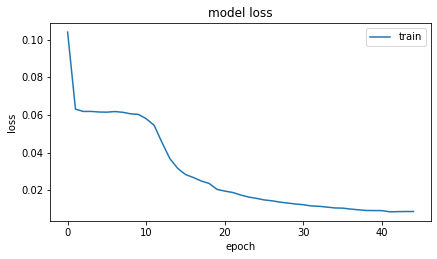

In [15]:
plot_history(train.history)

In [16]:
model.save('saved_model.h5')

In [17]:
def denormalize_keypoints(keypoints):
    keypoints = keypoints*50+100
    return keypoints

In [18]:
def preprocess_test(data):

    img_names = data['Unnamed: 0'].values
    X = []
    Y = []
    n = 0

    for file in img_names:
        img = cv2.imread('/content/drive/My Drive/train-test-data/test/'+file)
        x,y,z = img.shape
        img = cv2.resize(img,(224,224))

        key_pts = data.iloc[n, 1:].to_numpy()
        key_pts = key_pts.astype('float').reshape(-1, 2)
        key_pts = key_pts * [224 / y, 224 / x]

        image_copy = np.copy(img)
        key_pts_copy = np.copy(key_pts)

        image_copy = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        image_copy=  image_copy/255.0

        X.append(image_copy)
        Y.append(key_pts_copy)

        n = n+1

    return X,Y

In [19]:
def plot_predictions(X_test,y_test,predictions):

    show = 10
    for i in range(show):

      plt.figure(figsize=(20,10))

      ax = plt.subplot(1,show,i+1)

      image = X_test[i]
      p = predictions[i]
      y = y_test[i]

      plt.imshow(np.squeeze(image), cmap = 'gray')
      plt.scatter(p[:,0],p[:,1],s=20, marker='.', c='m')
      plt.scatter(y[:, 0], y[:, 1], s=20, marker='.', c='g')


    plt.show()

In [20]:
test_keypoints = pd.read_csv('/content/drive/My Drive/train-test-data/test_frames_keypoints.csv')

In [21]:
test_keypoints.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135
0,James_Wolfensohn_00.jpg,25.0,44.0,25.0,49.0,25.0,54.0,25.0,59.0,26.0,64.0,27.0,67.0,30.0,71.0,33.0,75.0,39.0,76.0,46.0,76.0,52.0,74.0,56.0,72.0,59.0,67.0,62.0,62.0,63.0,57.0,64.0,52.0,65.0,47.0,27.0,40.0,30.0,39.0,32.0,...,33.0,65.0,36.0,64.0,38.0,64.0,39.0,65.0,41.0,64.0,44.0,65.0,47.0,65.0,44.0,66.0,42.0,68.0,39.0,68.0,37.0,68.0,36.0,66.0,33.0,65.0,38.0,65.0,39.0,65.0,42.0,65.0,46.0,65.0,42.0,65.0,39.0,65.0,38.0,65.0
1,Valerie_Harper_30.jpg,55.0,62.0,52.0,72.0,52.0,83.0,55.0,90.0,55.0,101.0,57.0,108.0,60.0,114.0,65.0,121.0,75.0,127.0,88.0,124.0,98.0,122.0,106.0,117.0,114.0,112.0,122.0,102.0,124.0,94.0,129.0,87.0,129.0,76.0,57.0,52.0,60.0,50.0,65.0,...,65.0,101.0,68.0,101.0,70.0,98.0,75.0,101.0,78.0,101.0,83.0,104.0,88.0,106.0,83.0,109.0,78.0,109.0,73.0,109.0,70.0,109.0,68.0,106.0,65.0,101.0,70.0,104.0,75.0,104.0,78.0,104.0,88.0,106.0,78.0,106.0,75.0,104.0,70.0,104.0
2,Kristen_Breitweiser_11.jpg,60.0,88.0,60.0,98.0,63.0,109.0,65.0,116.0,68.0,127.0,73.0,135.0,78.0,137.0,83.0,140.0,96.0,143.0,109.0,138.0,119.0,135.0,127.0,130.0,132.0,125.0,135.0,115.0,135.0,105.0,137.0,95.0,137.0,84.0,63.0,75.0,65.0,70.0,71.0,...,78.0,119.0,83.0,114.0,89.0,112.0,91.0,112.0,94.0,112.0,101.0,112.0,109.0,117.0,101.0,120.0,96.0,122.0,94.0,122.0,89.0,122.0,83.0,122.0,81.0,119.0,89.0,117.0,91.0,114.0,96.0,114.0,106.0,117.0,96.0,117.0,94.0,117.0,89.0,117.0
3,Elizabeth_Dole_31.jpg,41.0,96.0,43.0,104.0,47.0,113.0,49.0,120.0,56.0,128.0,64.0,135.0,73.0,139.0,83.0,144.0,96.0,144.0,105.0,137.0,107.0,133.0,107.0,127.0,109.0,120.0,109.0,112.0,109.0,103.0,109.0,95.0,107.0,86.0,60.0,83.0,66.0,79.0,73.0,...,83.0,122.0,90.0,120.0,94.0,116.0,98.0,116.0,100.0,116.0,103.0,116.0,103.0,118.0,103.0,122.0,100.0,125.0,98.0,127.0,94.0,127.0,90.0,124.0,83.0,122.0,94.0,120.0,96.0,118.0,98.0,118.0,103.0,118.0,98.0,120.0,96.0,122.0,94.0,122.0
4,Kit_Bond_20.jpg,35.0,67.0,37.0,74.0,41.0,81.0,44.0,87.0,48.0,96.0,51.0,103.0,58.0,108.0,66.0,112.0,76.0,112.0,85.0,107.0,91.0,100.0,94.0,93.0,96.0,84.0,96.0,77.0,96.0,70.0,96.0,64.0,94.0,55.0,42.0,67.0,48.0,65.0,51.0,...,60.0,94.0,64.0,96.0,69.0,94.0,73.0,94.0,74.0,94.0,80.0,94.0,83.0,93.0,80.0,98.0,78.0,101.0,73.0,101.0,69.0,101.0,66.0,99.0,60.0,94.0,69.0,96.0,73.0,96.0,76.0,96.0,83.0,93.0,76.0,98.0,73.0,98.0,69.0,98.0


In [22]:
X_test,y_test = preprocess_test(test_keypoints)

In [23]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [24]:
X_test = np.expand_dims(X_test,axis = 3)

In [25]:
predictions = model.predict(X_test)
predictions.shape

(770, 136)

In [26]:
predictions = np.reshape(predictions,(predictions.shape[0],int(predictions.shape[1]/2),2))

In [27]:
for i in range(predictions.shape[0]):
    predictions[i] = denormalize_keypoints(predictions[i])

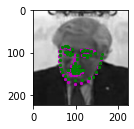

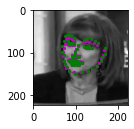

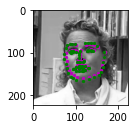

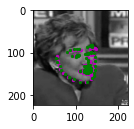

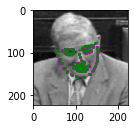

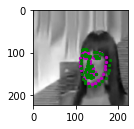

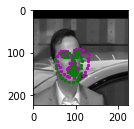

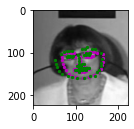

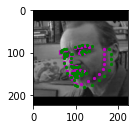

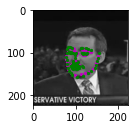

In [28]:
plot_predictions(X_test,y_test,predictions)